In [1]:
import math
import pandas as pd
import random
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# Prepare data

## Data

In [2]:
data = pd.DataFrame(columns=[
    'Age',
    'Height (cm)',
    'Weight (kg)',
    'Amiodarone',
    'Smokes',
    'Race Black or African American',
    'CYP2C9 *2',
    'CYP2C9 *3',
    'VKORC1',
    'Target INR',
    'dose',
    'type'])

**Explain**

sample = {  
'Age': int 20-90 (for adult only),  
'Height (cm)': double 140-200,  
'Weight (kg)': double with bmi in range (16 < $\frac{weight}{height^2} < 30$),  

'Amiodarone': 0-1,  
'Smoke': 0-1,  
 
'Race Black or African American': 0-1,   
If true is 1 else 0  
  
'CYP2C9 *2': 0-2,  
'CYP2C9 *3': 0-2,  
sum cant bigger than 2

'VKORC1': 0-2,  

'Target INR': 1-3.5

'dose': double calc from below function,  
'type': 0 - low, 1 - medium, 2 - high calc from below function  
}

## Calc dose function


In [3]:
def calc_dose(sampl):
    dose = math.exp(0.9751
                    - 0.3238 * sampl['VKORC1']
                    + 0.4317 * (0.0235 * sampl['Weight (kg)'] ** 0.51456 * sampl['Height (cm)'] ** 0.42246)  # BSA
                    - 0.00745 * sampl['Age']
                    - 0.0901 * sampl['Race Black or African American']
                    + 0.0922 * sampl['Smokes']
                    - 0.2538 * sampl['Amiodarone']
                    - 0.2066 * sampl['CYP2C9 *2']
                    - 0.4008 * sampl['CYP2C9 *3']
                    + 0.2029 * sampl['Target INR']
                    ) * 7
    if dose < 7:
        level = 0
    elif 7 <= dose < 14:
        level = 1
    elif 14 <= dose < 21:
        level = 2
    elif 21 <= dose < 28:
        level = 3
    elif 28 <= dose < 35:
        level = 4
    elif 35 <= dose < 42:
        level = 5
    elif 42 <= dose < 52.5:
        level = 6
    elif 52.5 <= dose < 56:
        level = 7
    elif 56 <= dose < 70:
        level = 8
    elif 70 <= dose < 84:
        level = 9
    elif 84 <= dose < 105:
        level = 10
    else:
        level = 11
    return dose, level

## Random data function

In [4]:
def create_data():
    sample = {
        'Age': 0,
        'Height (cm)': 0,
        'Weight (kg)': 0,

        'Amiodarone': 0,
        'Smokes': 0,

        'Race Black or African American': 0,

        'CYP2C9 *2': 0,
        'CYP2C9 *3': 0,

        'VKORC1': 0,
        'Target INR': 0,

        'dose': 0,
        'type': 0
    }

    sample['Age'] = random.randint(20, 90)
    sample['Height (cm)'] = random.uniform(1.4, 2) * 100
    while not (16 <= sample['Weight (kg)'] / ((sample['Height (cm)'] / 100) ** 2) <= 30):
        sample['Weight (kg)'] = random.uniform(31.36, 200)

    sample['Amiodarone'] = random.randint(0, 1)
    sample['Smokes'] = random.randint(0, 1)
    sample['Target INR'] = random.uniform(1, 3.5)

    race = random.randint(0, 12)
    match race:
        case 2 | 5 | 8 | 11:
            sample['Race Black or African American'] = 1

    cyp2d9 = random.randint(0, 24)
    match cyp2d9:
        case 2 | 8 | 14 | 20:
            sample['CYP2C9 *2'] = 1
        case 3 | 9 | 15 | 21:
            sample['CYP2C9 *3'] = 1
        case 4 | 10 | 16 | 22:
            sample['CYP2C9 *2'] = 2
        case 5 | 11 | 17 | 23:
            sample['CYP2C9 *2'] = 1
            sample['CYP2C9 *3'] = 1
        case 6 | 12 | 18 | 24:
            sample['CYP2C9 *3'] = 2

    vkorc1 = random.randint(0, 12)
    match vkorc1:
        case 1 | 4 | 7 | 10:
            sample['VKORC1'] = 2
        case 2 | 5 | 8 | 11:
            sample['VKORC1'] = 1
        case 3 | 6 | 9 | 12:
            sample['VKORC1'] = 0

    sample['dose'], sample['type'] = calc_dose(sample)

    return sample


## Generate data

In [5]:
dict_data = []
data_size = 100000
for i in range(data_size):
    dict_data.append(create_data())
data = data._append(dict_data, ignore_index=True)

In [6]:
print("Age: %.2f ± %.2f" % (data['Age'].mean(), data['Age'].std()))
print("Height (cm): %.2f ± %.2f" % (data['Height (cm)'].mean(), data['Height (cm)'].std()))
print("Weight (kg): %.2f ± %.2f" % (data['Weight (kg)'].mean(), data['Weight (kg)'].std()))
aminodarone = data['Amiodarone'].sum()
print("Amiodarone: %2.2f%% (%d)" % (aminodarone / data_size * 100, aminodarone))
smoke = data['Smokes'].sum()
print("Smokes: %2.2f%% (%d)" % (smoke / data_size * 100, smoke))

Age: 55.01 ± 20.49
Height (cm): 170.03 ± 17.31
Weight (kg): 67.20 ± 18.13
Amiodarone: 50.06% (50058)
Smokes: 50.26% (50258)


In [7]:
def pct(x):
    print('{:.4f}% ({:.0f})'.format(x, data_size * x / 100))
    return '{:.4f}%\n({:.0f})'.format(x, data_size * x / 100)

30.6700% (30670)
69.3300% (69330)


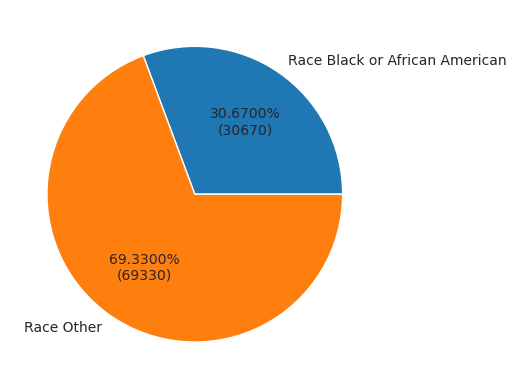

In [8]:
values = [data['Race Black or African American'].sum(),
          data_size - data['Race Black or African American'].sum()
          ]
labels = [
    'Race Black or African American',
    'Race Other']
_ = plt.pie(values, labels=labels, autopct=pct)
plt.show()

19.9600% (19960)
16.1060% (16106)
16.1710% (16171)
15.8920% (15892)
16.0070% (16007)
15.8640% (15864)


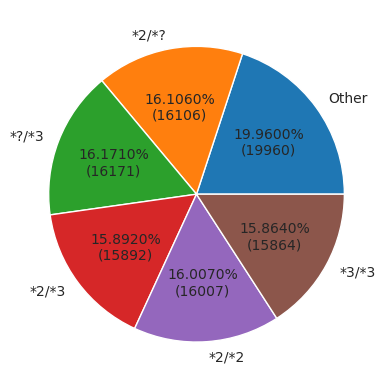

In [9]:
values = [
    len(data[(data['CYP2C9 *2'] == 0) & (data['CYP2C9 *3'] == 0)]),
    len(data[(data['CYP2C9 *2'] == 1) & (data['CYP2C9 *3'] == 0)]),
    len(data[(data['CYP2C9 *2'] == 0) & (data['CYP2C9 *3'] == 1)]),
    len(data[(data['CYP2C9 *2'] == 1) & (data['CYP2C9 *3'] == 1)]),
    len(data[(data['CYP2C9 *2'] == 2) & (data['CYP2C9 *3'] == 0)]),
    len(data[(data['CYP2C9 *2'] == 0) & (data['CYP2C9 *3'] == 2)]),
]
labels = ['Other', '*2/*?', '*?/*3', '*2/*3', '*2/*2', '*3/*3']
_ = plt.pie(values, labels=labels, autopct=pct)
plt.show()

30.7610% (30761)
30.7620% (30762)
38.4770% (38477)


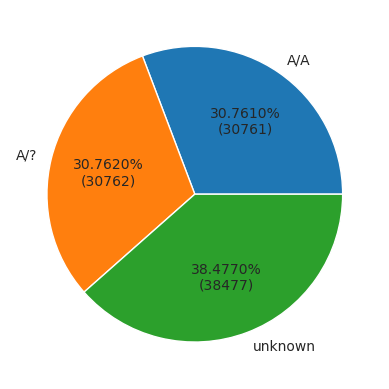

In [10]:
values = [data['VKORC1'].value_counts()[2],
          data['VKORC1'].value_counts()[1],
          data['VKORC1'].value_counts()[0],
          ]
labels = ['A/A', 'A/?', 'unknown']
_ = plt.pie(values, labels=labels, autopct=pct)
plt.show()

In [11]:
ratio = 0.7
pointer = int(ratio * data_size)
train_set = data.iloc[:pointer, :-2]
test_set = data.iloc[pointer:, :-2]
train_dose = data.iloc[:pointer, -1:].values
test_dose = data.iloc[pointer:, -1:].values

In [12]:
arms = np.arange(12)
accuracy = []
A_map = {}
b_map = {}
for arm in arms:
    A_map[arm] = np.identity(len(list(train_set)))
    b_map[arm] = np.zeros(len(list(train_set)))

for epoch in range(200):
    start_time = time.time()
    # train
    indices = np.random.permutation(list(range(len(train_set))))
    for i in indices:
        feature = np.array(train_set.iloc[i], dtype=float)
        # iterate through actions
        p = {}
        max_value = -np.inf
        max_arm = 0
        for arm in arms:
            theta = np.matmul(np.linalg.inv(A_map[arm]), b_map[arm])
            p = np.matmul(theta.T, feature) + \
                np.sqrt(np.matmul(np.matmul(feature.T, np.linalg.inv(A_map[arm])), feature))

            if p == max_value:
                if np.random.choice(a=[False, True]): max_arm = arm
            elif p > max_value:
                max_value = p
                max_arm = arm

        # observe reward and update A and b
        r = -abs(train_dose[i][0]-max_arm)
        A_map[max_arm] += np.outer(feature, feature)
        b_map[max_arm] += r * feature

    # test
    correct_count = 0
    count = 0
    higher = 0
    lower = 0
    for i in range(len(test_set)):
        count += 1
        feature = np.array(test_set.iloc[i], dtype=float)
        # iterate through actions
        p = {}
        max_value = -np.inf
        max_arm = 0
        for arm in arms:
            theta = np.matmul(np.linalg.inv(A_map[arm]), b_map[arm])
            p = np.matmul(theta.T, feature) + \
                np.sqrt(np.matmul(np.matmul(feature.T, np.linalg.inv(A_map[arm])), feature))
            if p == max_value:
                if np.random.choice(a=[False, True]): max_arm = arm
            elif p > max_value:
                max_value = p
                max_arm = arm

        if max_arm == test_dose[i]:
            correct_count += 1
        elif max_arm < test_dose[i]:
            lower += test_dose[i] - max_arm
        else:
            higher += max_arm - test_dose[i]

    end_time = time.time()
    accu = correct_count / count
    print("Epoch %d: Accuracy: %.5f%% (%d/%d), Higher: %d, Lower: %d, Time: %.5fs" % (
        epoch, accu * 100, correct_count, count, higher, lower, end_time - start_time))
    accuracy.append(accu)


Epoch 0: Accuracy: 51.68000% (15504/30000), Higher: 7316, Lower: 8266, Time: 31.81646s
Epoch 1: Accuracy: 56.74000% (17022/30000), Higher: 6573, Lower: 7235, Time: 31.24101s
Epoch 2: Accuracy: 54.41000% (16323/30000), Higher: 5859, Lower: 8792, Time: 31.99711s
Epoch 3: Accuracy: 55.22000% (16566/30000), Higher: 5632, Lower: 8819, Time: 32.56005s
Epoch 4: Accuracy: 53.58333% (16075/30000), Higher: 6480, Lower: 8545, Time: 31.89859s
Epoch 5: Accuracy: 52.20667% (15662/30000), Higher: 6115, Lower: 9334, Time: 31.82382s
Epoch 6: Accuracy: 51.67667% (15503/30000), Higher: 6130, Lower: 9573, Time: 31.56326s
Epoch 7: Accuracy: 52.15333% (15646/30000), Higher: 6983, Lower: 8579, Time: 32.49357s
Epoch 8: Accuracy: 53.06333% (15919/30000), Higher: 6334, Lower: 8986, Time: 31.96664s
Epoch 9: Accuracy: 55.08333% (16525/30000), Higher: 5767, Lower: 8856, Time: 32.07642s
Epoch 10: Accuracy: 53.98000% (16194/30000), Higher: 6221, Lower: 8778, Time: 32.26320s
Epoch 11: Accuracy: 55.64667% (16694/30000

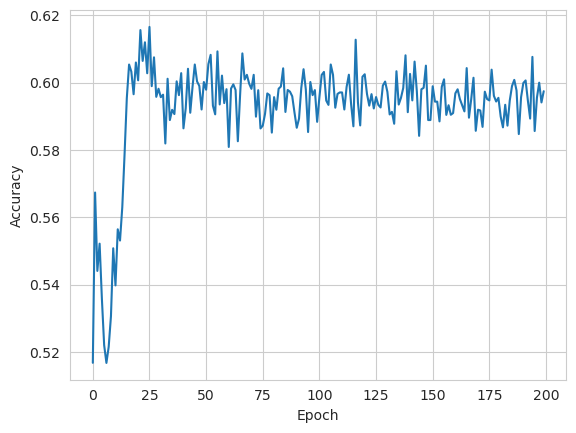

In [13]:
plt.plot(accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

Validate: Accuracy: 59.76900% (59769/100000)


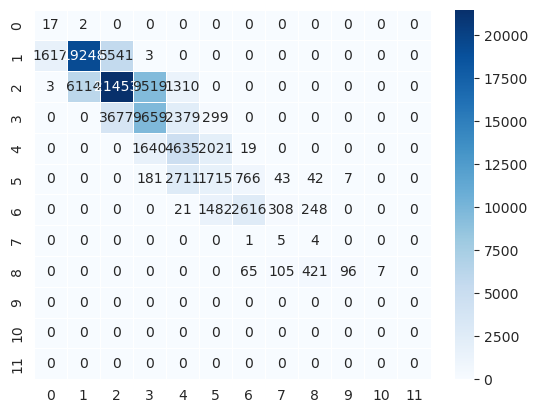

In [14]:
val_set = data.iloc[:,:-2]
val_dose = data.iloc[:,-1:].values
arms = np.arange(12)
correct_count = 0
count = 0
heatmap = np.zeros((12,12))

for i in range(len(data)):
    count += 1
    feature = np.array(val_set.iloc[i], dtype=float)
    # iterate through actions
    p = {}
    max_value = -np.inf
    max_arm = 0
    for arm in arms:
        theta = np.matmul(np.linalg.inv(A_map[arm]), b_map[arm])
        p = np.matmul(theta.T, feature) + \
            np.sqrt(np.matmul(np.matmul(feature.T,np.linalg.inv(A_map[arm])), feature))
        if p == max_value:
            if np.random.choice(a=[False, True]): max_arm = arm
        elif p > max_value:
            max_value = p
            max_arm = arm

    if max_arm == val_dose[i]:
        correct_count += 1
    heatmap[max_arm][val_dose[i][0]] += 1

accu = correct_count/count
print("Validate: Accuracy: %.5f%% (%d/%d)"%(accu*100,correct_count,count))
ax = sns.heatmap(heatmap, linewidth=0.5,annot=True,cmap='Blues', fmt='.20g')
plt.show()

# Test real data
## Filter

In [15]:
# https://api.pharmgkb.org/v1/download/submission/553247439
warfarin = pd.read_excel('PS206767-553247439.xls', sheet_name=1)

In [16]:
warfarin_clean = warfarin.loc[:,
                 [
                     'Race (OMB)',
                     'Age',
                     'Height (cm)',
                     'Weight (kg)',

                     # drug
                     'Amiodarone (Cordarone)',
                     'Current Smoker',

                     'VKORC1 -1639 consensus',
                     'CYP2C9 consensus',
                     'Target INR',
                     'Estimated Target INR Range Based on Indication',
                     'Therapeutic Dose of Warfarin', ]]
warfarin_clean = warfarin_clean.dropna(subset=['Height (cm)',
                                               'Weight (kg)',
                                               'Therapeutic Dose of Warfarin',
                                              ])

## Convert to Gage Form

In [17]:
data = pd.DataFrame(columns=[
    'Age',
    'Height (cm)',
    'Weight (kg)',
    'Amiodarone',
    'Smokes',
    'Race Black or African American',
    'CYP2C9 *2',
    'CYP2C9 *3',
    'VKORC1',
    'Target INR',
    'dose',
    'type'])

In [18]:
warfarin_data = []

for index, row in warfarin_clean.iterrows():
    sample = {
        'Age': 0,
        'Height (cm)': row['Height (cm)'],
        'Weight (kg)': row['Weight (kg)'],

        'Amiodarone': row['Amiodarone (Cordarone)'],
        'Smokes': row['Current Smoker'],

        'Race Black or African American': 0,

        'CYP2C9 *2': 0,
        'CYP2C9 *3': 0,
        'VKORC1': 0,
        'Target INR': 0,

        'dose': row['Therapeutic Dose of Warfarin'],
        'type': 0
    }
    if not pd.isnull(row['Target INR']):
        sample['Target INR'] = row['Target INR']
    else:
        if not pd.isnull(row['Estimated Target INR Range Based on Indication']):
            sample['Target INR'] = float(str(row['Estimated Target INR Range Based on Indication']).split('-')[1])
        else:
            continue

    age = str(row['Age']).split('-')
    if len(age) == 2:
        sample['Age'] = int(age[1])
    else:
        sample['Age'] = 100
    match row['Race (OMB)']:
        case 'Black or African American':
            sample['Race Black or African American'] = 1

    if pd.isnull(row['VKORC1 -1639 consensus']):
        pass
    else:
        sample['VKORC1'] = str(row['VKORC1 -1639 consensus']).count('A')

    sample['CYP2C9 *2'] = str(row['CYP2C9 consensus']).count('*2')
    sample['CYP2C9 *3'] = str(row['CYP2C9 consensus']).count('*3')

    if sample['dose'] < 7:
        sample['type'] = 0
    elif 7 <= sample['dose'] < 14:
        sample['type'] = 1
    elif 14 <= sample['dose'] < 21:
        sample['type'] = 2
    elif 21 <= sample['dose'] < 28:
        sample['type'] = 3
    elif 28 <= sample['dose'] < 35:
        sample['type'] = 4
    elif 35 <= sample['dose'] < 42:
        sample['type'] = 5
    elif 42 <= sample['dose'] < 52.5:
        sample['type'] = 6
    elif 52.5 <= sample['dose'] < 56:
        sample['type'] = 7
    elif 56 <= sample['dose'] < 70:
        sample['type'] = 8
    elif 70 <= sample['dose'] < 84:
        sample['type'] = 9
    elif 84 <= sample['dose'] < 105:
        sample['type'] = 10
    else:
        sample['type'] = 11
    warfarin_data.append(sample)

data = data._append(warfarin_data, ignore_index=True)

In [19]:
data_size = len(data)
print("Sample:", data_size)
print("Age: %.2f ± %.2f" % (data['Age'].mean(), data['Age'].std()))
print("Height (cm): %.2f ± %.2f" % (data['Height (cm)'].mean(), data['Height (cm)'].std()))
print("Weight (kg): %.2f ± %.2f" % (data['Weight (kg)'].mean(), data['Weight (kg)'].std()))
print("Target INR: %.2f ± %.2f" % (data['Target INR'].mean(), data['Target INR'].std()))
aminodarone = data['Amiodarone'].sum()
print("Amiodarone: %2.2f%% (%d)" % (aminodarone / data_size * 100, aminodarone))
smoke = data['Smokes'].sum()
print("Smokes: %2.2f%% (%d)" % (smoke / data_size * 100, smoke))

Sample: 3663
Age: 67.92 ± 15.13
Height (cm): 169.61 ± 10.55
Weight (kg): 81.90 ± 22.09
Target INR: 2.95 ± 0.35
Amiodarone: 5.43% (199)
Smokes: 10.37% (380)


12.1485% (445)
87.8515% (3218)


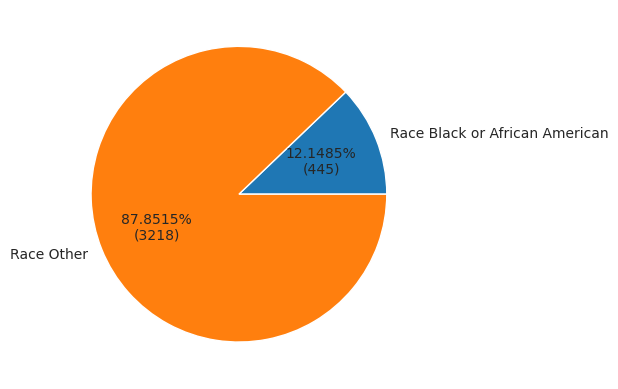

In [20]:
values = [data['Race Black or African American'].sum(),
          data_size - data['Race Black or African American'].sum()]
labels = ['Race Black or African American',
          'Race Other']
_ = plt.pie(values, labels=labels, autopct=pct)
plt.show()

71.9083% (2634)
15.8613% (581)
9.2547% (339)
1.4742% (54)
1.2012% (44)
0.3003% (11)


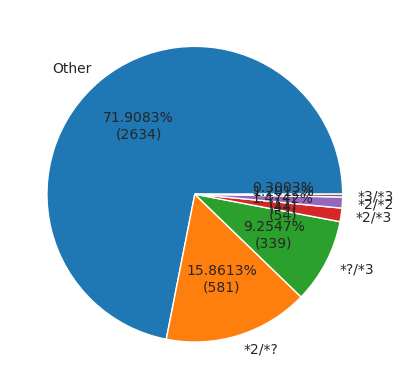

In [21]:
values = [
    len(data[(data['CYP2C9 *2'] == 0) & (data['CYP2C9 *3'] == 0)]),
    len(data[(data['CYP2C9 *2'] == 1) & (data['CYP2C9 *3'] == 0)]),
    len(data[(data['CYP2C9 *2'] == 0) & (data['CYP2C9 *3'] == 1)]),
    len(data[(data['CYP2C9 *2'] == 1) & (data['CYP2C9 *3'] == 1)]),
    len(data[(data['CYP2C9 *2'] == 2) & (data['CYP2C9 *3'] == 0)]),
    len(data[(data['CYP2C9 *2'] == 0) & (data['CYP2C9 *3'] == 2)]),
]
labels = ['Other', '*2/*?', '*?/*3', '*2/*3', '*2/*2', '*3/*3']
_ = plt.pie(values, labels=labels, autopct=pct)
plt.show()

18.1545% (665)
30.4668% (1116)
51.3786% (1882)


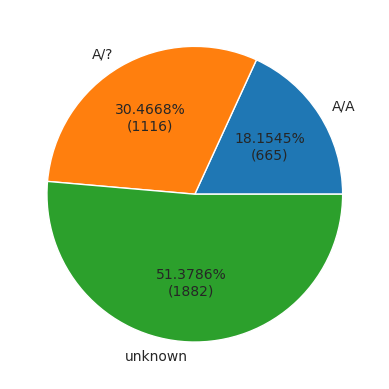

In [22]:
values = [data['VKORC1'].value_counts()[2],
          data['VKORC1'].value_counts()[1],
          data['VKORC1'].value_counts()[0],
          ]
labels = ['A/A', 'A/?', 'unknown']
_ = plt.pie(values, labels=labels, autopct=pct)
plt.show()

In [23]:
val_set = data.iloc[:, :-2]
val_dose = data.iloc[:, -1:].values

Validate: Accuracy: 18.59132% (681/3663)


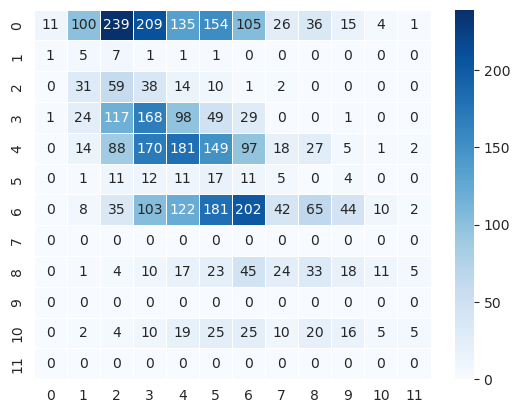

In [24]:
arms = np.arange(12)
correct_count = 0
count = 0
heatmap = np.zeros((12,12))

for i in range(len(data)):
    count += 1
    feature = np.array(val_set.iloc[i], dtype=float)
    # iterate through actions
    p = {}
    max_value = -np.inf
    max_arm = 0
    for arm in arms:
        theta = np.matmul(np.linalg.inv(A_map[arm]), b_map[arm])
        p = np.matmul(theta.T, feature) + \
            np.sqrt(np.matmul(np.matmul(feature.T,np.linalg.inv(A_map[arm])), feature))
        if p == max_value:
            if np.random.choice(a=[False, True]): max_arm = arm
        elif p > max_value:
            max_value = p
            max_arm = arm

    if max_arm == val_dose[i]:
        correct_count += 1
    heatmap[max_arm][val_dose[i][0]] += 1

accu = correct_count/count
print("Validate: Accuracy: %.5f%% (%d/%d)"%(accu*100,correct_count,count))
ax = sns.heatmap(heatmap, linewidth=0.5,annot=True,cmap='Blues', fmt='.20g')
plt.show()

In [25]:
correct_count = 0
for index, row in data.iterrows():
    if calc_dose(row)[1] == row['type']:
        correct_count += 1
print("Correct: %f (%d/%d)"%(correct_count/count*100,correct_count,count))

Correct: 17.990718 (659/3663)
